### **Logistic Regression Intuition**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output
import pandas as pd


In [57]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')


data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/LogisticRegressionPractice/Logistic Regression/data.txt' , header = None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
data


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [59]:
data.columns = ['X1', 'X2' , 'Y']

In [60]:
data


,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [61]:

X_train = data[['X1', 'X2']].values
y_train = data['Y'].values

(100,)


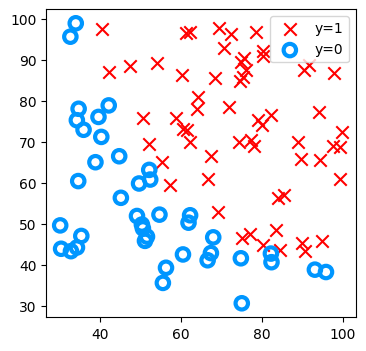

In [62]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)



<ipython-input-64-ad0276eccdef>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[row_indices, 0], X_train[row_indices, 1], cmap='Paired', label=f'Class {class_val}')


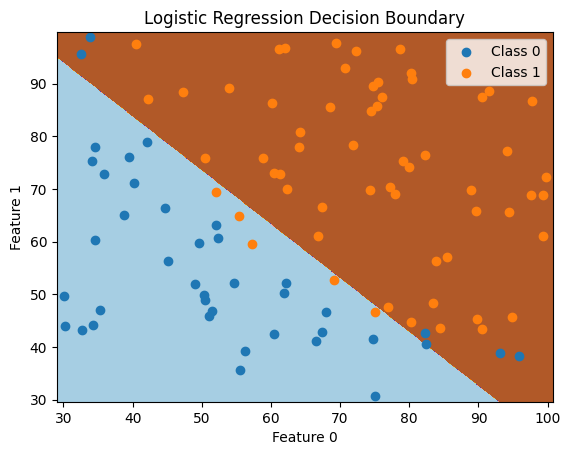

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

min_x0, max_x0 = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
min_x1, max_x1 = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

x0_grid = np.arange(min_x0, max_x0, 0.1)
x1_grid = np.arange(min_x1, max_x1, 0.1)

xx, yy = np.meshgrid(x0_grid, x1_grid)

r0, r1 = xx.flatten(), yy.flatten()
r0, r1 = r0.reshape((len(r0), 1)), r1.reshape((len(r1), 1))

grid = np.hstack((r0, r1))

predictions = log_reg_model.predict(grid)

zz = predictions.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')

for class_val in np.unique(y_train):
    row_indices = np.where(y_train == class_val)
    plt.scatter(X_train[row_indices, 0], X_train[row_indices, 1], cmap='Paired', label=f'Class {class_val}')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


#Practice with Custom Logisitic Regression

In [65]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [66]:
def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [67]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]


In [68]:
def train(X, y, num_iterations, learning_rate):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = gradient_descent(X, h, y)
        theta -= learning_rate * gradient
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost_function(h, y)}")
    return theta


In [69]:
def plot_decision_boundary(X, y, theta):
    # Plot data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    # Decision boundary
    x_value = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_value = -(theta[0] + theta[1] * x_value) / theta[2]
    plt.plot(x_value, y_value, label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.3118023105495262
Cost after iteration 2000: 0.2624721708515831
Cost after iteration 3000: 0.24237007355855217
Cost after iteration 4000: 0.23136764424597606
Cost after iteration 5000: 0.22446309385148794
Cost after iteration 6000: 0.2197721126393114
Cost after iteration 7000: 0.21641494333213845
Cost after iteration 8000: 0.21392243802572858
Cost after iteration 9000: 0.2120205986050259


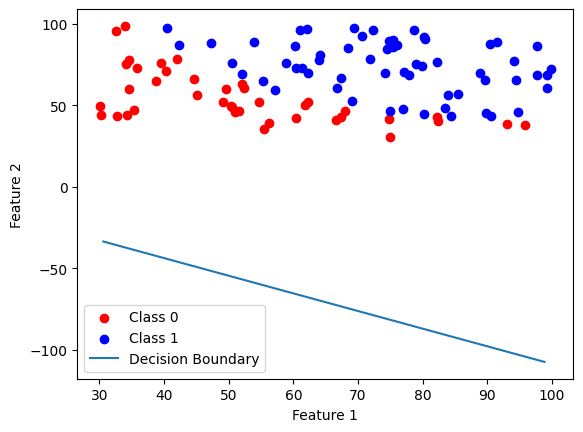

In [71]:
theta = train(X_scaled, y_train, num_iterations=10000, learning_rate=0.01)
plot_decision_boundary(X_train, y_train, theta)


In [72]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [73]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

nan


<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: divide by zero encountered in log
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: invalid value encountered in double_scalars
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)


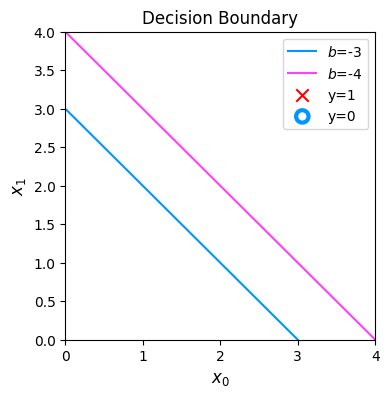

In [74]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="$b$=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [75]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  nan
Cost for b = -4 :  nan


<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: divide by zero encountered in log
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: invalid value encountered in double_scalars
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)


### **Gradient Descent**

In [76]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # print(m,n)
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [77]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing

In [78]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: divide by zero encountered in log
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
<ipython-input-72-4433b24bcab4>:20: RuntimeWarning: invalid value encountered in double_scalars
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)


Iteration    0: Cost nan   
Iteration 1000: Cost 80.07806339845048   
Iteration 2000: Cost nan   
Iteration 3000: Cost nan   
Iteration 4000: Cost 75.48204241897366   
Iteration 5000: Cost nan   
Iteration 6000: Cost nan   
Iteration 7000: Cost 76.4457166518186   
Iteration 8000: Cost nan   
Iteration 9000: Cost nan   

updated parameters: w:[ 4.14128327 -0.60975616], b:-76.84490263182613


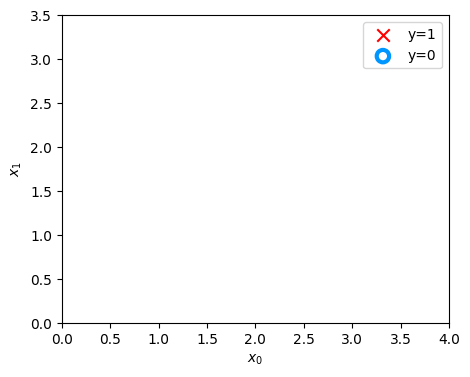

In [79]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )



ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='#0096ff', lw=1)
plt.show()